NAME: SHAW, OLUWAGBOUNMI PRECIOUS 
<br> Student ID: st20182956 
<br> PROGRAM: Msc. DATA SCIENCE (INTERNSHIP)
<br> COURSE: GEOSPATIAL ANALYSIS 


# TASK 2.3

In [7]:
#Import all the libraries needed
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#keys for Twitter APi 
auth = tweepy.OAuthHandler("7YWwchZ5FJSaSkUqGh1dcqRPd", "sMIrTG99VAu7IhpIE6GeNxAfVZrGJgUyv9QOr7lGzTvHUvV2Fv")
auth.set_access_token("1155160241358721024-M0Ps3SBjKSjMHjK5SJDbddxQsDMaao", "KguQcFIY4ESvTo285izomSI2eOpfuNJUKEpmO3Mni0F8r")
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#search and scrap tweets from twitter 
new_search = '#CovidVaccination'
tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2020-01-01').items(500)

In [10]:
#save the tweets to a dataframe 
df =pd.DataFrame([item.text for item in tweets], columns=['Tweets'])
df

,Tweets
0,Listen up: #coronavirus #COVID19 #COVIDVaccina...
1,Finances play a factor in a colleges' decision...
2,RT @BayandaGumede: Gauteng is experiencing a c...
3,COVID-19 vaccination FAQs: students in Higher ...
4,"@RandPaul Ok, Senator fair enough. But vaccine..."
...,...
495,RT @McfaddenBrandy: If the @CDCgov @CDCDirecto...
496,RT @htTweets: #COVIDVaccination | States seek ...
497,RT @dt_next: Actor @Suriya_offl and #Jyothika ...
498,RT @i_sumantsen: #COVID19 | After administerin...


In [11]:
#cleaning the data
def cleanTxt(text):
    text = re.sub(r'@[A-za-z0-9]+', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Listen up: coronavirus COVID19 COVIDVaccinatio...
1,Finances play a factor in a colleges' decision...
2,: Gauteng is experiencing a crisis. We are und...
3,COVID-19 vaccination FAQs: students in Higher ...
4,"Ok, Senator fair enough. But vaccine hesitanc..."
...,...
495,: If the can compile numbers of Covid19 pati...
496,: COVIDVaccination | States seek more vaccines...
497,: Actor and Jyothika got their Covid vaccinat...
498,: COVID19 | After administering a record 87+ l...


In [12]:
#Sujectivity
def getsubjectivity(string):
    return TextBlob(string).sentiment.subjectivity

#Polarity
def getpolarity(string):
    return TextBlob(string).sentiment.polarity

#Add subjectivity and poloarity to data frame 
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] =df['Tweets'].apply(getpolarity)
df

,Tweets,Subjectivity,Polarity
0,Listen up: coronavirus COVID19 COVIDVaccinatio...,0.000000,0.000000
1,Finances play a factor in a colleges' decision...,0.000000,0.000000
2,: Gauteng is experiencing a crisis. We are und...,0.000000,0.000000
3,COVID-19 vaccination FAQs: students in Higher ...,0.500000,0.250000
4,"Ok, Senator fair enough. But vaccine hesitanc...",0.633333,0.400000
...,...,...,...
495,: If the can compile numbers of Covid19 pati...,0.000000,0.000000
496,: COVIDVaccination | States seek more vaccines...,0.477273,0.318182
497,: Actor and Jyothika got their Covid vaccinat...,0.000000,0.000000
498,: COVID19 | After administering a record 87+ l...,0.000000,0.000000


In [13]:
#Positive, Negative, Neutral 
def getAnalysis(points):
    if points < 0:
        return 'Negative'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#Add analysis to the dataframe 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Listen up: coronavirus COVID19 COVIDVaccinatio...,0.000000,0.000000,Neutral
1,Finances play a factor in a colleges' decision...,0.000000,0.000000,Neutral
2,: Gauteng is experiencing a crisis. We are und...,0.000000,0.000000,Neutral
3,COVID-19 vaccination FAQs: students in Higher ...,0.500000,0.250000,Positive
4,"Ok, Senator fair enough. But vaccine hesitanc...",0.633333,0.400000,Positive
...,...,...,...,...
495,: If the can compile numbers of Covid19 pati...,0.000000,0.000000,Neutral
496,: COVIDVaccination | States seek more vaccines...,0.477273,0.318182,Positive
497,: Actor and Jyothika got their Covid vaccinat...,0.000000,0.000000,Neutral
498,: COVID19 | After administering a record 87+ l...,0.000000,0.000000,Neutral


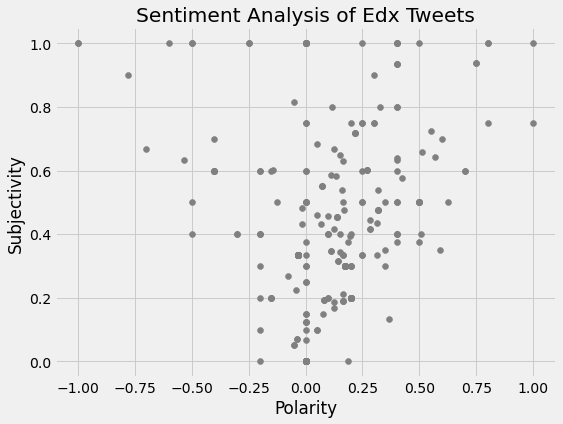

In [14]:
#Plot polarity against subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Grey')
    
plt.title('Sentiment Analysis of Edx Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
df['Analysis'].value_counts()

Neutral     261
Positive    155
Negative     84
Name: Analysis, dtype: int64

In [16]:
#percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

31.0

In [17]:
#percentage of negative tweets 
ngtweets = df[df.Analysis == 'Negative']
ngtweets = ngtweets['Tweets']

round((ngtweets.shape[0] / df.shape[0]) * 100, 1)

16.8

In [18]:
#percentage of neutral tweets 
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

52.2

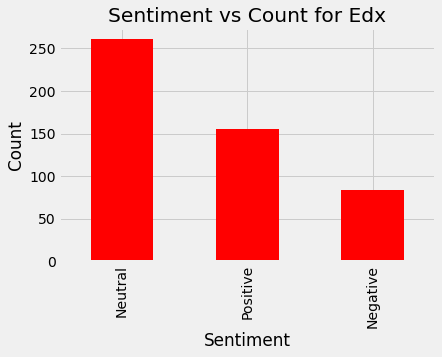

In [19]:
#Plotting the counts 
plt.title('Sentiment vs Count for Edx')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar', color='Red')
plt.show()

> We can see that we have more positve tweets than both neutral and negative.

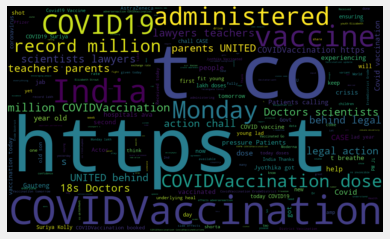

In [21]:
#Plotting WordCloud 
allwords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=600, random_state =21, max_font_size=200).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

> From the analysis of tweets on #CovidVaccination hashtag, it can be deduced that the public was more receptive of it than otherwise.Nevertheless, there were some neutral tweets which indicated the uncertainty some peple felt toward the vaccination and the negative tweets showed that others has negative thoughts on it and it's implication. 